# Method 3: Pre-processing and Train Model
### Pre-processing

In [1]:
import pandas as pd
import numpy as np

In [2]:
reviews_sample = pd.read_csv('reviews10000.csv')

In [3]:
reviews_sample.head()

,Unnamed: 0,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,4694397,Llol4TRuLoVmCsbVSnuIDA,75JyTel9uUs7VNFhTmK56w,sPwgafejYVdf8hd4-oDYVg,1.0,2015-08-30 17:32:01,Awful. The lemon pepper wing sauce is black fo...,0,0,0
1,3142277,moHHEwAINiwsjohq6doYrQ,lhDgwKq2Gh8TIIyexubRag,9U4Tqt5SkZKQ6eeH6IPSxQ,5.0,2018-04-11 04:36:23,We had an awesome experience at hibachi. Our c...,0,0,1
2,2342009,6TF21--YL6ig6r0Oae1qGA,jpib9MAMB_aVxyCDUi9VAg,yFUvKpW66cNsYXD6inDsog,5.0,2015-01-27 03:54:16,I truly enjoy this neighborhood spot. Good foo...,0,0,0
3,3547267,MN2PqoIWECNmI3fuqdZyEA,bFF1HZzb8k3gimLHU52bQA,WnOVGJTu7RK0iWurrgiBNA,5.0,2018-06-28 19:06:47,Best tanning place around in NC\r\r\nHope and ...,0,0,0
4,4449537,MG4o8ke2G6VYXDy1HUCbIg,PT3whiZ1mW3psCz_lcp7ww,6BO1PcdtU6idqO0njUnCYA,1.0,2016-07-12 16:49:09,Staff is horrible. Last time I ordered from he...,0,0,1


In [4]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

In [5]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/svmanning/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/svmanning/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
 nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/svmanning/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

***Preprocessing***
1. Expand contractions
2. Handle negation 
3. Remove punctuation
4. Remove stop words
5. bigrams, trigrams, fourgrams

***STOP WORDS***

{‘ourselves’, ‘hers’, ‘between’, ‘yourself’, ‘but’, ‘again’, ‘there’, ‘about’, ‘once’, ‘during’, ‘out’, ‘very’, ‘having’, ‘with’, ‘they’, ‘own’, ‘an’, ‘be’, ‘some’, ‘for’, ‘do’, ‘its’, ‘yours’, ‘such’, ‘into’, ‘of’, ‘most’, ‘itself’, ‘other’, ‘off’, ‘is’, ‘s’, ‘am’, ‘or’, ‘who’, ‘as’, ‘from’, ‘him’, ‘each’, ‘the’, ‘themselves’, ‘until’, ‘below’, ‘are’, ‘we’, ‘these’, ‘your’, ‘his’, ‘through’, ‘don’, ‘nor’, ‘me’, ‘were’, ‘her’, ‘more’, ‘himself’, ‘this’, ‘down’, ‘should’, ‘our’, ‘their’, ‘while’, ‘above’, ‘both’, ‘up’, ‘to’, ‘ours’, ‘had’, ‘she’, ‘all’, ‘no’, ‘when’, ‘at’, ‘any’, ‘before’, ‘them’, ‘same’, ‘and’, ‘been’, ‘have’, ‘in’, ‘will’, ‘on’, ‘does’, ‘yourselves’, ‘then’, ‘that’, ‘because’, ‘what’, ‘over’, ‘why’, ‘so’, ‘can’, ‘did’, ‘not’, ‘now’, ‘under’, ‘he’, ‘you’, ‘herself’, ‘has’, ‘just’, ‘where’, ‘too’, ‘only’, ‘myself’, ‘which’, ‘those’, ‘i’, ‘after’, ‘few’, ‘whom’, ‘t’, ‘being’, ‘if’, ‘theirs’, ‘my’, ‘against’, ‘a’, ‘by’, ‘doing’, ‘it’, ‘how’, ‘further’, ‘was’, ‘here’, ‘than’}

<img src="negation alg.png">

In [8]:
contractions_dict = { 
"ain't": "am not / are not / is not / has not / have not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is / how does",
"I'd": "I had / I would",
"I'd've": "I would have",
"I'll": "I shall / I will",
"I'll've": "I shall have / I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}

In [9]:
#function to expand contractions to their full form 

import re

contractions_re = re.compile('(%s)' % '|'.join(contractions_dict.keys()))
def expand_contractions(s, contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    
    return contractions_re.sub(replace, s)

In [10]:
sample_text = "As a Temple student, I love this place! The food is fantastic! They have gourmet style pizzas that are New York style and fantastic. The bar isn't too expensive, and is always a fun time!"

sample_text = expand_contractions(sample_text)

print(sample_text)

As a Temple student, I love this place! The food is fantastic! They have gourmet style pizzas that are New York style and fantastic. The bar is not too expensive, and is always a fun time!


In [11]:
negation_vocab = ["not", "no"]

adj_noun_verb = ["JJ", "JJR", "JJS", "NN", "NNP", "NNPS", "NNS", "VB", "VBD", "VBG", "VBN", "VBP", "VBZ"]

adverb_determiner = ["RB", "RBR", "RBS", "DT"]
adjective = ["JJ", "JJR", "JJS"]

adverb = ["RB", "RBR", "RBS"]


In [12]:
#implementation of above algorithm
import nltk

def handle_negations(text):
    text = text.split()
    
    flag = False
    
    for i in range(0,len(text)):
        
        word = text[i]
        # get the next word
        if i+1 < (len(text)-1):
            next_word = text[i+1]
        else:
            next_word = ""
        
        # get the next next word
        if i+2 < (len(text)-1):
            next_next_word = text[i+2]
        else:
            next_next_word = ""
        
        
        # if word is a negation word switch the flag
        if word in negation_vocab:
            flag = not flag
            #print("Switching Flag")
        
        if flag == True:
            
            if i < (len(text)-1):
                word_pos = get_POS(text, i)
            else:
                word_pos = "BLANK"
            
            if i+1 < (len(text)-1):
                next_word_pos = get_POS(text, i+1)
            else:
                next_word_pos = "BLANK"
            
            if i+2 < (len(text)-1):
                next_next_word_pos = get_POS(text, i+2)
            else:
                next_next_word_pos = "BLANK"
            
            #print(word, next_word, next_next_word)
            #print(word_pos, next_word_pos, next_next_word_pos)
            
            #if word adj, noun, verb
            if next_word_pos in adj_noun_verb:
                #print("word is adjective, noun, or verb")
                next_word = "not_" + next_word
                #print(next_word)
                text[i+1] = next_word
               
            
            #if word adverb or determiner & next word adjective
            if word_pos in adverb_determiner and next_word_pos in adjective:
                #print("word is adverb or determiner")
                next_word = "not_" + next_word
                #print(next_word)
                text[i+1] = next_word
            
            #if word determiner and next word adverb and next next word adjective
            if word_pos in adverb_determiner and next_word_pos in adverb and next_next_word_pos in adjective:
                #print("word is determiner")
                next_next_word = "not_" + next_next_word
                #print(next_next_word)
                text[i+2] = next_next_word
        
            flag = False

    return ' '.join(text)

In [16]:
sample_text = "As a Temple student, I love this place! The food is fantastic! They have gourmet style pizzas that are New York style and fantastic. The bar isn't too expensive, and is always a fun time!"
sample_text = expand_contractions(sample_text)

text = handle_negations(sample_text)
print(text)




As a Temple student, I love this place! The food is fantastic! They have gourmet style pizzas that are New York style and fantastic. The bar is not too not_expensive, and is always a fun time!


In [17]:
sample_text_2 = "Good appetizer but I wasn't impressed with the pasta dishes."  
sample_text_2 = expand_contractions(sample_text_2)

handle_negations(sample_text_2)

'Good appetizer but I was not not_impressed with the pasta dishes.'

In [15]:
# function to get the part of speech of a word

def get_POS(word_list, position):    
    pos_tuple = nltk.pos_tag(word_list)
    (word, pos) = pos_tuple[position]
    
    return pos

In [37]:
 nltk.download('tagsets')

[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\tuf87933\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping help\tagsets.zip.


True

In [38]:
# all the possible tags
nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

In [18]:
sample_text = "As a Temple student, I love this place! The food is fantastic! They have gourmet style pizzas that are New York style and fantastic. The bar isn't too expensive, and is always a fun time!"

split = handle_negations(sample_text)
print(split)

As a Temple student, I love this place! The food is fantastic! They have gourmet style pizzas that are New York style and fantastic. The bar isn't too expensive, and is always a fun time!


In [19]:
# function to remove all punctuation except underscores and stop words

import string 
import re

def remove_punc_stop(text):
    
    remove = string.punctuation
    remove = remove.replace("_", "") # don't remove hyphens
    pattern = r"[{}]".format(remove) # create the pattern
    nopunc = re.sub(pattern, "", text)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    

In [20]:
sample_text = "As a Temple student, I love this place! The food is fantastic! They have gourmet style pizzas that are New York style and fantastic. The bar isn't too expensive, and is always a fun time!"

sample_text = remove_punc_stop(sample_text)
print(sample_text)

['Temple', 'student', 'love', 'place', 'food', 'fantastic', 'gourmet', 'style', 'pizzas', 'New', 'York', 'style', 'fantastic', 'bar', 'isnt', 'expensive', 'always', 'fun', 'time']


In [24]:
import string 
import re

def NOT_make_bigrams(text):
    
    remove = string.punctuation
    remove = remove.replace("_", "") # don't remove hyphens
    pattern = r"[{}]".format(remove) # create the pattern
    nopunc = re.sub(pattern, "", text)
    
    text = nopunc.split()
    grams = []
    
    for i in range(0,len(text) - 1):
        if i+1 < len(text):
            temp = text[i] + ' ' + text[i+1]
            grams.append(temp)
    
    return grams

In [21]:
import string 
import re

def make_bigrams(text):
    
    remove = string.punctuation
    remove = remove.replace("_", "") # don't remove hyphens
    pattern = r"[{}]".format(remove) # create the pattern
    nopunc = re.sub(pattern, "", text)
    
    text = nopunc.split()
    
    grams = []
    for i in range(0,len(text)):
    
        word = text[i]
    
        # get the next word
        if i+1 < (len(text)):
            next_word = text[i+1]
        else:
            next_word = ""
         
        #print(word, next_word)
        
         # get the parts of speech 
        if i < (len(text)):
            word_pos = get_POS(text, i)
        else:
            word_pos = "BLANK"
            
        if i+1 < (len(text)-1):
            next_word_pos = get_POS(text, i+1)
        else:
            next_word_pos = "BLANK"
                
        if word_pos in adjective and next_word_pos in adj_noun_verb:
            temp = word + ' ' + next_word
            grams.append(temp)
    
    return grams

In [22]:
#sample_text = "As a Temple student, I love this place! The food is fantastic! They have gourmet style pizzas that are New York style and fantastic. The bar isn't too expensive, and is always a fun time!"
sample_text = "Maxis has delicious pizza and great hot wings."


grams = make_bigrams(sample_text)
print(grams)

['delicious pizza', 'great hot']


In [27]:
import string 
import re

def NOT_make_trigrams(text):
    
    remove = string.punctuation
    remove = remove.replace("_", "") # don't remove hyphens
    pattern = r"[{}]".format(remove) # create the pattern
    nopunc = re.sub(pattern, "", text)
    
    text = nopunc.split()
    grams = []
    
    for i in range(0,len(text) - 1):
        if i+2 < len(text):
            temp = text[i] + ' ' + text[i+1] + ' ' + text[i+2]
            grams.append(temp)
    
    return grams

In [23]:
import string 
import re

def make_trigrams(text):
    
    remove = string.punctuation
    remove = remove.replace("_", "") # don't remove hyphens
    pattern = r"[{}]".format(remove) # create the pattern
    nopunc = re.sub(pattern, "", text)
    
    text = nopunc.split()
    grams = []
    for i in range(0,len(text)):
    
        word = text[i]
    
        # get the next word
        if i+1 < (len(text)):
            next_word = text[i+1]
        else:
            next_word = ""
            
        # get the next word
        if i+2 < (len(text)):
            next_next_word = text[i+2]
        else:
            next_next_word = ""
            
        #print(word, next_word, next_next_word)
    
        # get the parts of speech 
        if i < (len(text)):
            word_pos = get_POS(text, i)
        else:
            word_pos = "BLANK"
            
        if i+1 < (len(text)):
            next_word_pos = get_POS(text, i+1)
        else:
            next_word_pos = "BLANK"
            
        if i+2 < (len(text)):
            next_next_word_pos = get_POS(text, i+2)
        else:
            next_next_word_pos = "BLANK"
                  
        if word_pos in adjective and next_word_pos in adjective:
            temp = word + ' ' + next_word + ' ' + next_next_word
            grams.append(temp)
    
    return grams

In [24]:
#sample_text = "As a Temple student, I love this place! The food is fantastic! They have gourmet style pizzas that are New York style and fantastic. The bar isn't too expensive, and is always a fun time!"
sample_text = "Maxis has delicious pizza and delicious hot wings."

grams = make_trigrams(sample_text)
print(grams)

['delicious hot wings']


In [25]:
import string 
import re

def make_fourgrams(text):
    
    remove = string.punctuation
    remove = remove.replace("_", "") # don't remove hyphens
    pattern = r"[{}]".format(remove) # create the pattern
    nopunc = re.sub(pattern, "", text)
    
    text = nopunc.split()
    
    grams = []
    for i in range(0,len(text)):
    
        word = text[i]
    
        # get the next word
        if i+1 < (len(text)-1):
            next_word = text[i+1]
        else:
            next_word = ""
        
        # get the next next word
        if i+2 < (len(text)-1):
            next_next_word = text[i+2]
        else:
            next_next_word = ""
            
        
        # get the next next next word
        if i+3 < (len(text)-1):
            next_next_next_word = text[i+3]
        else:
            next_next_word = ""
        
        #print(word, next_word, next_next_word, next_next_next_word)
        
        # get the parts of speech 
        if i < (len(text)-1):
            word_pos = get_POS(text, i)
        else:
            word_pos = "BLANK"
            
        if i+1 < (len(text)-1):
            next_word_pos = get_POS(text, i+1)
        else:
            next_word_pos = "BLANK"
            
        if i+2 < (len(text)-1):
            next_next_word_pos = get_POS(text, i+2)
        else:
            next_next_word_pos = "BLANK"
            
        if i+3 < (len(text)-1):
            next_next_next_word_pos = get_POS(text, i+3)
        else:
            next_next_next_word_pos = "BLANK"
            
        #DT + RB + RB + JJ
        if word_pos == "DT" and next_word_pos == "RB" and next_next_word_pos == "RB" and next_next_next_word_pos == "JJ":
            temp = word + ' ' + next_word + ' ' + next_next_word + ' ' + next_next_next_word
            #print(temp)
            grams.append(temp)
        
        
        #CD + IN + DT + JJS
        if word_pos == "CD" and next_word_pos == "IN" and next_next_word_pos == "DT" and next_next_next_word_pos == "JJS":
            temp = word + ' ' + next_word + ' ' + next_next_word + ' ' + next_next_next_word
            #print(temp)
            grams.append(temp)
            

    return grams
            
        
                

In [26]:
sample_text = "As a Temple student, I love this place! The food is fantastic! They have a very very good phone and one of the best phones!"

grams = make_fourgrams(sample_text)
print(grams)

['a very very good', 'one of the best']


In [48]:
# function to combine all preprocessing
# iteration 3
def text_process(text):
    
    text = expand_contractions(text)
    text = handle_negations(text)
    
    text_copy = text #store a copy of the text with punctuation and stop words
    
    text = remove_punc_stop(text)
    
    bigrams = make_bigrams(text_copy)
    #trigrams = make_trigrams(unmodified_text)
    #fourgrams = make_fourgrams(unmodified_text)
    
    text.extend(bigrams) # add bigrams to the list of words
    #text.extend(trigrams)
    #text.extend(fourgrams)
    
    return text

In [49]:
sample_text = "As a Temple student, I love this place! The food is fantastic! They have gourmet style pizzas that are New York style and fantastic. The bar isn't too expensive, and is always a fun time!"

preprocessed = text_process(sample_text)
print(preprocessed)


['Temple', 'student', 'love', 'place', 'food', 'fantastic', 'gourmet', 'style', 'pizzas', 'New', 'York', 'style', 'fantastic', 'bar', 'not_expensive', 'always', 'fun', 'time']


In [50]:
# get just the text from the collection of reviews
review_text = reviews_sample['text']
review_stars = reviews_sample['stars']

In [51]:
from sklearn.feature_extraction.text import CountVectorizer

In [52]:
# process text using text_process
# bow_transformer = CountVectorizer(analyzer=text_process).fit(X)
bow_transformer = CountVectorizer(analyzer=text_process).fit(review_text)

In [53]:
# size of the vocabulary stored in the vectorizer
len(bow_transformer.vocabulary_)

79447

In [54]:
# Review 20

# Text
review_20 = review_text[20]
print(review_20)

# Feature Vector
print("\n")
bow_20 = bow_transformer.transform([review_20])
print(bow_20)

# First 3 Words
print("\n")
print(bow_transformer.get_feature_names()[13102])
print(bow_transformer.get_feature_names()[14457])
print(bow_transformer.get_feature_names()[18862])

Thanks guys.. did a great job. My wife is very happy. Yes .. I would tell a friend to come see you.. to thumbs up


  (0, 14695)	1
  (0, 16201)	1
  (0, 25552)	1
  (0, 36629)	1
  (0, 39253)	1
  (0, 39671)	1
  (0, 40366)	1
  (0, 40662)	1
  (0, 40675)	1
  (0, 44215)	1
  (0, 66759)	1
  (0, 73063)	1
  (0, 73648)	1
  (0, 78208)	1
  (0, 78834)	1


Saltado
Ta
available right


In [55]:
review_50 = review_text[50]
print(review_50)

print("\n")
bow_50 = bow_transformer.transform([review_50])
print(bow_50)

# words that appears 3 times
print("\n")
print(bow_transformer.get_feature_names()[18559])
print(bow_transformer.get_feature_names()[27386])

Took a free trial class this weekend and signed up for an unlimited membership. I really appreciate the friendly and kind staff, and Stephanie has been my favorite trainer so far. Hours are perfect for my work schedule and I love the weekend hours as well.

I would like to update with a few more things that I love about Orange Theory: (1) Class size is limited. Ensures that everyone has enough space. (2) The apps that keep track of your classes and monitor your progress are fab! I love apps. (3) Trainer directed class. It's like having a personal trainer. You just listen and go! (4) Every class is different. (5) Nearly impossible to slack off and not have a great workout.


  (0, 31)	1
  (0, 460)	1
  (0, 678)	1
  (0, 812)	1
  (0, 938)	1
  (0, 4173)	1
  (0, 5589)	1
  (0, 5685)	1
  (0, 7676)	1
  (0, 10572)	1
  (0, 11034)	1
  (0, 14051)	1
  (0, 14707)	1
  (0, 14866)	1
  (0, 14956)	1
  (0, 18069)	1
  (0, 18115)	2
  (0, 24814)	3
  (0, 24816)	1
  (0, 29285)	1
  (0, 29746)	1
  (0, 31756)	1
  

In [56]:
#X = bow_transformer.transform(X)

transformed_review_text = bow_transformer.transform(review_text)


In [57]:
print('Shape of Sparse Matrix: ', transformed_review_text.shape)
print('Amount of Non-Zero occurrences: ', transformed_review_text.nnz)
# Percentage of non-zero values
density = (100.0 * transformed_review_text.nnz / (transformed_review_text.shape[0] * transformed_review_text.shape[1]))
print('Density: ', density)

Shape of Sparse Matrix:  (10000, 79447)
Amount of Non-Zero occurrences:  547542
Density:  0.06891915364960288


### Train Model
#### Method 3: Expand contractions, handle negations, remove stop words and punctuation, bigrams, trigrams, fourgrams,

In [58]:
from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
X_train, X_test, y_train, y_test = train_test_split(transformed_review_text, review_stars, test_size=0.3, random_state=101)

In [59]:
from sklearn.naive_bayes import MultinomialNB

# train model
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [60]:
# store predictions as a separate dataframe
preds = nb.predict(X_test)

In [61]:
from sklearn.metrics import confusion_matrix, classification_report

# confusion matrix
print("Confusion Matrix\n")
print(confusion_matrix(y_test, preds))
print('\n')
print(classification_report(y_test, preds))

Confusion Matrix

[[ 309    4    4   36   88]
 [  68    3    4   71   73]
 [  32    3    4  145  138]
 [  20    4    4  286  416]
 [  34    2    0  109 1143]]


              precision    recall  f1-score   support

         1.0       0.67      0.70      0.68       441
         2.0       0.19      0.01      0.03       219
         3.0       0.25      0.01      0.02       322
         4.0       0.44      0.39      0.42       730
         5.0       0.62      0.89      0.73      1288

   micro avg       0.58      0.58      0.58      3000
   macro avg       0.43      0.40      0.37      3000
weighted avg       0.51      0.58      0.52      3000



In [63]:
!source activate py3k;pip install mlxtend

    100% |████████████████████████████████| 1.3MB 1.1MB/s ta 0:00:01


In [64]:
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

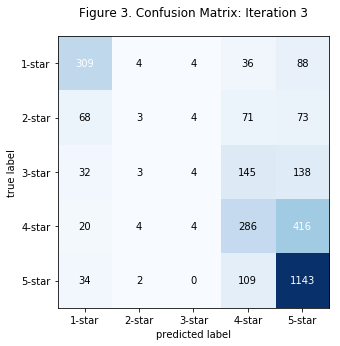

In [65]:
binary = np.array([[309,4,4,36,88],
 [68,3,4,71,73],
 [32,3,4,145,138],
 [20,4,4,286,416],
 [34,2,0,109,1143]])

labels = ['1-star', '2-star', '3-star', '4-star', '5-star']
fig, ax = plot_confusion_matrix(conf_mat=binary, figsize=(5,5))
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.title('Figure 3. Confusion Matrix: Iteration 3')
plt.show()